# Sentiments Analysis of Movie Dialogs
Here's my plan:
1. Get a dataset of movie dialogs
2. Explore Sentiment Analysis libraries, and analyze dialogs for sentiment polarity (+ve, neutral, and -ve sentiments)

## Movie Dialog Dataset
I am going to use this movie dialog corpus on Kaggle as my dataset of movie dialogs:  
https://www.kaggle.com/Cornell-University/movie-dialog-corpus#movie_lines.tsv

This is a tab separated file of dialogs. Each line is of following format:
```
L1045	u0	m0	BIANCA	They do not!
```

I am going to use pandas to load this file.  
Note:
1. File has no header
2. Seperator is tab
3. I only want the last column (4)
4. And I want a list of it

In [1]:
import pandas as pd

In [2]:
dialog_list = pd.read_csv('movie_lines.tsv', header=None, usecols=[4], sep='\t')[4].tolist()

## Explore Sentiment Analysis Libraries
One kind of analysis I am going to do is related to sentiment polarity. I.e. to explore the distribution of positive, negative and neutral sentiments in movie dialogs. Several NLP libraries can be used for this. I am going to begin with the following two:
  * TextBlob: https://textblob.readthedocs.io/en/dev/
  * NLTK: https://www.nltk.org/
Let me now explore them one by one

### TextBlob

In [3]:
from textblob import TextBlob

In [4]:
sentiment_scores_tb = [round(TextBlob(str(dialog)).sentiment.polarity, 2)
                       for dialog in dialog_list]
sentiment_category_tb = ['positive' if score > 0 else 'negative' if score < 0 else 'neutral' 
                         for score in sentiment_scores_tb]

let's plot and see now

In [5]:
import seaborn as sns

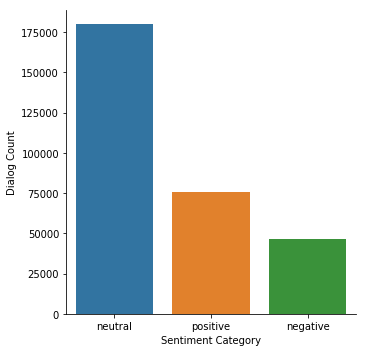

In [6]:
# sentiment statistics
df_pd = pd.DataFrame([sentiment_category_tb]).T
df_pd.columns = ['Sentiment Category']

# Draw a catplot to show count by sentiment_category
g_pd = sns.catplot(x="Sentiment Category", data=df_pd, kind="count")
g_pd.set_ylabels("Dialog Count")

### NLTK
I am going to use NLTK’s built-in Vader Sentiment Analyzer. This will simply rank a piece of text as positive, negative or neutral using a lexicon of positive and negative words.

In [7]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

In [8]:
sia = SentimentIntensityAnalyzer()
sentiment_scores_nltk = [sia.polarity_scores(str(dialog)) for dialog in dialog_list]

In [9]:
sentiment_category_nltk = ['positive' if score['compound'] > 0.25
                           else 'negative' if score['compound'] < -0.25
                           else 'neutral'
                           for score in sentiment_scores_nltk]

In [10]:
# Without placing into specifica categories (neutral, positive, negative)
# I can just sum up the category distributions
df_nltk_sum = pd.DataFrame(pd.DataFrame(sentiment_scores_nltk).sum())
df_nltk_sum.columns = ['Sum']
df_nltk_sum

,Sum
compound,11075.3443
neg,24022.3960
neu,242111.7730
pos,35821.8470


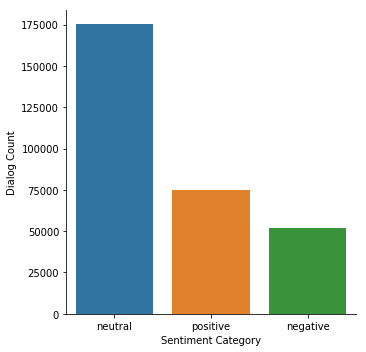

In [11]:
# sentiment statistics
df_nltk = pd.DataFrame([sentiment_category_nltk]).T
df_nltk.columns = ['Sentiment Category']

# Draw a catplot to show count by sentiment_category
g_nltk = sns.catplot(x="Sentiment Category", data=df_nltk, kind="count")
g_nltk.set_ylabels("Dialog Count")